In [2]:
%matplotlib inline
import numpy as np
from skimage.io import imread, imshow, imread
from skimage import img_as_float, img_as_ubyte
from numpy import dstack

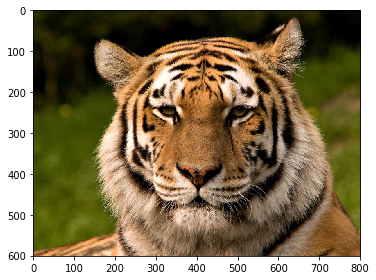

In [14]:
img = imread('images/tigesnose.png')
imshow(img)

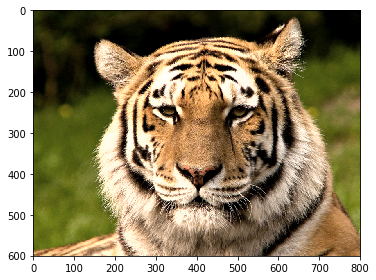

In [19]:
#1 Img as float
img = img_as_float(img)

#2 Transformation to YUV

r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

Y = 0.2126 * r + 0.7152 * g + 0.0722 * b
U = -0.0999 * r -0.3360 * g + 0.4360 * b
V = 0.6150 * r -0.5586 * g -0.0563 * b

#Y = 0.2126⋅𝑅+0.7152⋅𝐺+0.0722⋅𝐵
#U =−0.0999⋅𝑅−0.3360⋅𝐺+0.4360⋅𝐵
#V = 0.6150⋅𝑅−0.5586⋅𝐺−0.0563⋅𝐵

#3 -5% from top and bottom pixel treshold
k = round(Y.size * 0.05)
y = sorted(Y.flatten())
#print(y)
y = y[k : Y.size - k]
#print(y)
Y = np.clip(Y, min(y), max(y))

#print(Y)
#4 Linear expansion
#expanded = (Y - Y.min()) * (255 / (Y.max() - Y.min()))
expanded = (Y - Y.min()) / (Y.max() - Y.min())
#print(expanded)

#5 Clipping the values
#Y = img_as_float(expanded)
expanded = np.clip(expanded, 0, 1)

#6 RGB domain
R = expanded + 1.2803 * V
G = expanded - 0.2148 * U - 0.3805 * V
B = expanded + 2.1279 * U

#res = img.copy()
#res[:, :, 0] = R
#res[:, :, 1] = G
#res[:, :, 2] = B

res = dstack((R, G, B))

#7 Clip values once again
res = np.clip(res, 0, 1)
res = img_as_ubyte(res)
imshow(res)
#R = 𝑌 + 1.2803 ⋅ 𝑉
#G = 𝑌 − 0.2148 ⋅ 𝑈 − 0.3805 ⋅ 𝑉
#B = 𝑌 + 2.1279 ⋅ 𝑈